Solve 
\begin{equation}
    \dot{N} = \frac{dN}{dt} = -\lambda N
\end{equation}
using Euler's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exact_sol(N0, rate, time):
    return N0 * np.exp(-rate*time)

In [3]:
def dN_dt(N, rate, t):
    return - rate * N

In [4]:
def euler(N, rate, time, dt):
    for i in range(len(time)-1):
        N[i+1] = N[i] + dN_dt(N[i], rate, time[i])*dt
    return N

In [5]:
def rk4(N, rate, time, dt):
    for i in range(len(time)-1):
        k1 = dN_dt(N[i], rate, time[i]) * dt
        k2 = dN_dt(N[i] + k1/2, rate, time[i] + dt/2) * dt
        k3 = dN_dt(N[i] + k2/2, rate, time[i] + dt/2) * dt
        k4 = dN_dt(N[i] + k3, rate, time[i] + dt) * dt
        N[i+1] = N[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return N

In [6]:
npoints = 100
N = np.zeros(npoints)
N_euler = np.zeros(npoints)
N_rk4 = np.zeros(npoints)
rate = 1
t0 = 0
tf = 10
dt = (tf - t0)/npoints
time = np.linspace(t0, tf, npoints)
N[0] = 1
N_euler[0] = 1
N_rk4[0] = 1

In [7]:
#euler(N_euler, rate, time, dt)

In [8]:
#rk4(npoints, N_rk4, time, dt) - euler(npoints, N_euler, rate, time, dt)

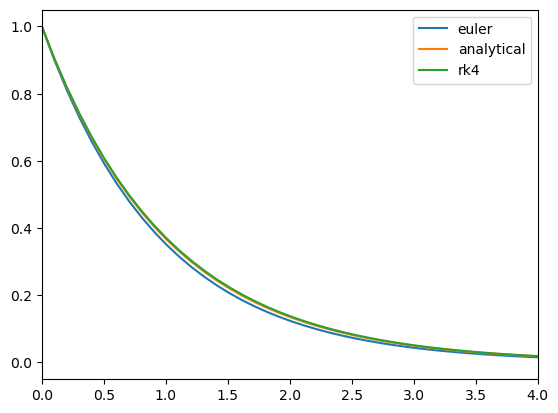

In [9]:
plt.figure()
plt.plot(time, euler(N_euler, rate, time, dt) , label = 'euler')
plt.plot(time, exact_sol(N0 = N[0], rate = rate, time=time), label = 'analytical')
plt.plot(time, rk4(N_rk4, rate, time, dt), label = 'rk4')
plt.xlim(0,4)
plt.legend()
plt.show()

In [10]:
ab_err_eul= abs(exact_sol(N0 = N[0], rate = rate, time=time) - euler(N_euler, rate, time, dt))
ab_err_rk4= abs(exact_sol(N0 = N[0], rate = rate, time=time) - rk4(N_rk4, rate, time, dt))

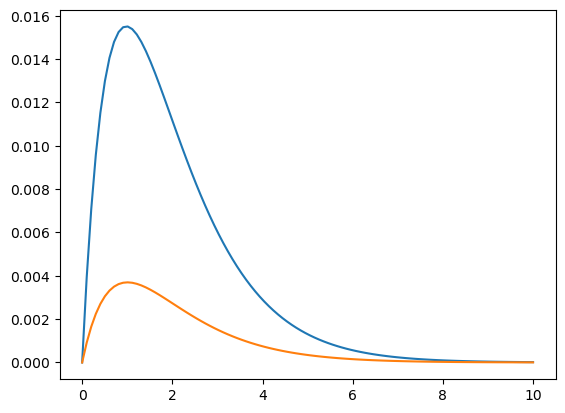

In [11]:
plt.figure()
plt.plot(time, ab_err_eul)
plt.plot(time, ab_err_rk4)